# Л2

## Входные данные
Датасет: **datasets/students_simple.csv**
Выбираются 2 слобкика данных по формулам:
1) $N$ % $5$
2) $N^2$ % $5 + 5$
где $N$ - номер в списке

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
path = 'students_simple.csv'
data = pd.read_csv(path)
print(data.head())
print('=---------------------=')
N = 16
col1 = N % 5
col2 = (N**2) % 5 + 5
data = data.iloc[:, [col1, col2]]
print(data.head())

   height  mass  income   iq  pages  age    bmi  work_exp  friends  test_time
0     159    45     430   95     24   20  3.533        26        5        8.5
1     160    61     640  115     32   25  2.623        63        7        6.2
2     161    56     610  111     24   28  2.875        94       10        6.8
3     162    48     330   97     24   19  3.375        16        4       12.0
4     162    54     420  105     60   23  3.000        49        2        7.5
=---------------------=
   mass    bmi
0    45  3.533
1    61  2.623
2    56  2.875
3    48  3.375
4    54  3.000


In [4]:
x = data['mass']
y = data['bmi']
print(x.shape)
print(y.shape)

(20,)
(20,)


## 1. Расчет корреляций
1. Фехнера
2. Пирсона + доверительный интервал
3. Спирмена
4. Кенделла

In [5]:
def feh(x, y):
    x_med = np.median(x)
    y_med = np.median(y)
    sig_x = np.sign(x - x_med)
    sig_y = np.sign(y - y_med)
    C = np.sum(sig_x == sig_y)
    H = np.sum(sig_x != sig_y)
    return (C - H) / (C + H)

In [6]:
rfeh = feh(x, y)
print(rfeh)

-1.0


In [7]:
def pers(x, y):
    n = len(x)
    mean_x, mean_y = np.mean(x), np.mean(y)
    std_x, std_y = np.std(x, ddof=1), np.std(y, ddof=1)
    cov_xy = np.sum((x - mean_x) * (y - mean_y)) / (n - 1)
    return cov_xy / (std_x * std_y)

In [8]:
rpers = pers(x, y)
print(rpers)

-0.9606094762709692


In [9]:
# check
from scipy.stats import pearsonr
pearson_corr, p_value = pearsonr(data.iloc[:, 0], data.iloc[:, 1])
print(f"{pearson_corr}")

-0.9606094762709692


In [10]:
# doveritelni
n = len(x)
z_r = np.arctanh(rpers)
se_z = 1 / np.sqrt(n - 3)
z_critical = stats.norm.ppf(0.975)
ci_zl = z_r - z_critical * se_z
ci_zu = z_r + z_critical * se_z

ci_persl = np.tanh(ci_zl)
ci_persu = np.tanh(ci_zu)
print(ci_persl)
print(ci_persu)

-0.9845908653854831
-0.9011643297616403


In [11]:
def sper(x, y):
    rank_x = stats.rankdata(x)
    rank_y = stats.rankdata(y)
    return pers(rank_x, rank_y)

In [12]:
rsper = sper(x,y)
print(rsper)

-0.9849454969323214


In [13]:
kend, _ = stats.kendalltau(x, y)
print(kend)

-0.9389953457668648


Коэффициент Фехнера -1.0 — указывает, что все точки лежат в «противофазных» квадрантах относительно медиан: если масса выше медианы, то BMI ниже медианы, и наоборот. Это говорит о идеальной монотонной противоположной связи по знаку отклонений, хотя не обязательно линейной.
Коэффициент пирсона  -0.961— свидетельствует о очень сильной линейной отрицательной зависимости. Доверительный интервал не включает 0, значит корреляция статистически значима (p < 0.05).
Коэффициент спирмена -0.985 — ещё ближе к -1, чем Пирсон, что указывает на почти идеальную монотонную убывающую связь.
Коэффициент кенделла -0.939 — также подтверждает очень сильную согласованность в убывающем порядке пар наблюдений.

## 2. Визуализация
1. Гистограммы
2. График рассеяния (scatter plot)

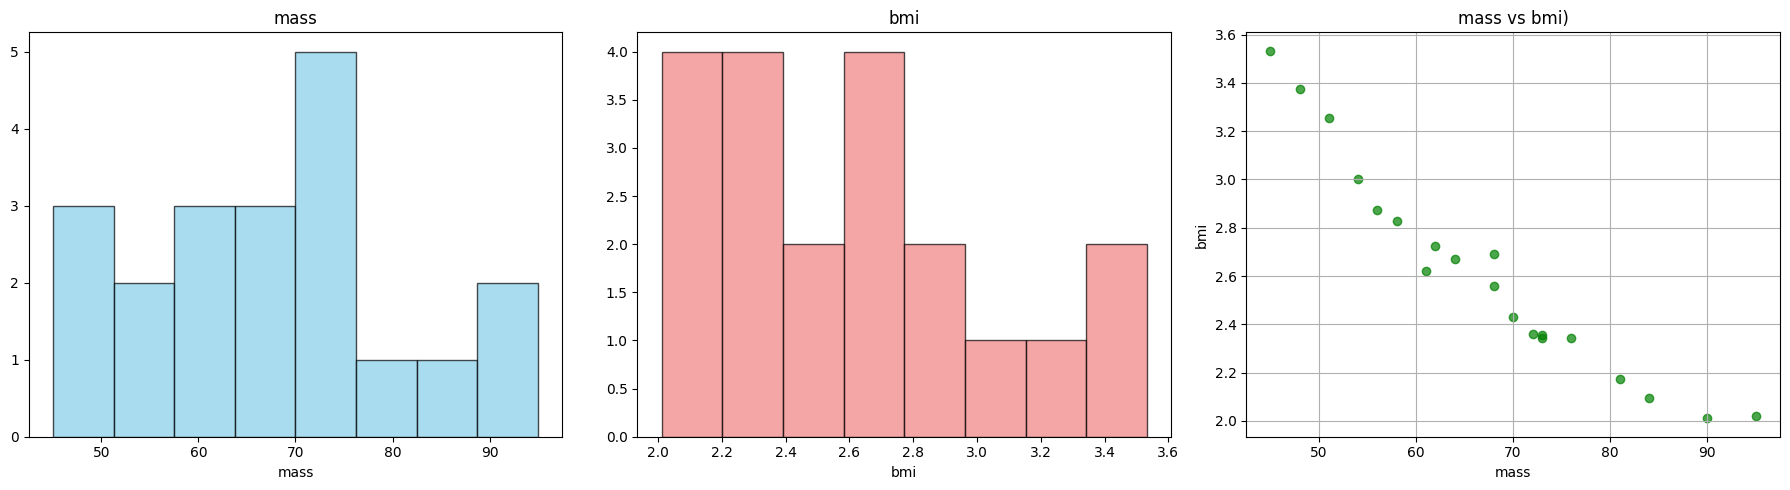

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(x, bins=8, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('mass')
axes[0].set_xlabel('mass')
axes[1].hist(y, bins=8, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].set_title('bmi')
axes[1].set_xlabel('bmi')

axes[2].scatter(x, y, color='green', alpha=0.7)
axes[2].set_title('mass vs bmi)')
axes[2].set_xlabel('mass')
axes[2].set_ylabel('bmi')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Между mass и bmi существует обратная зависимость, которая физически объясняется вариацией роста.

## 3. Уравнение регрессии
Построить уравнение регрессии по видам:
1. линейная, $y=w_1 x + w_0$
2. квадратичная, $y = w_2 x^2 + w_1 x + w_0$
3. гиперболическая, $y = \frac{w_1}{x} + w_0$
4. показательная, $y = w_1^x \cdot w_0$

Линейная R^2: 0.9228
Квадратичная R^2: 0.9779
Гиперболическая R^2: 0.9791
Показательная R^2: 0.9542
=---------------------=


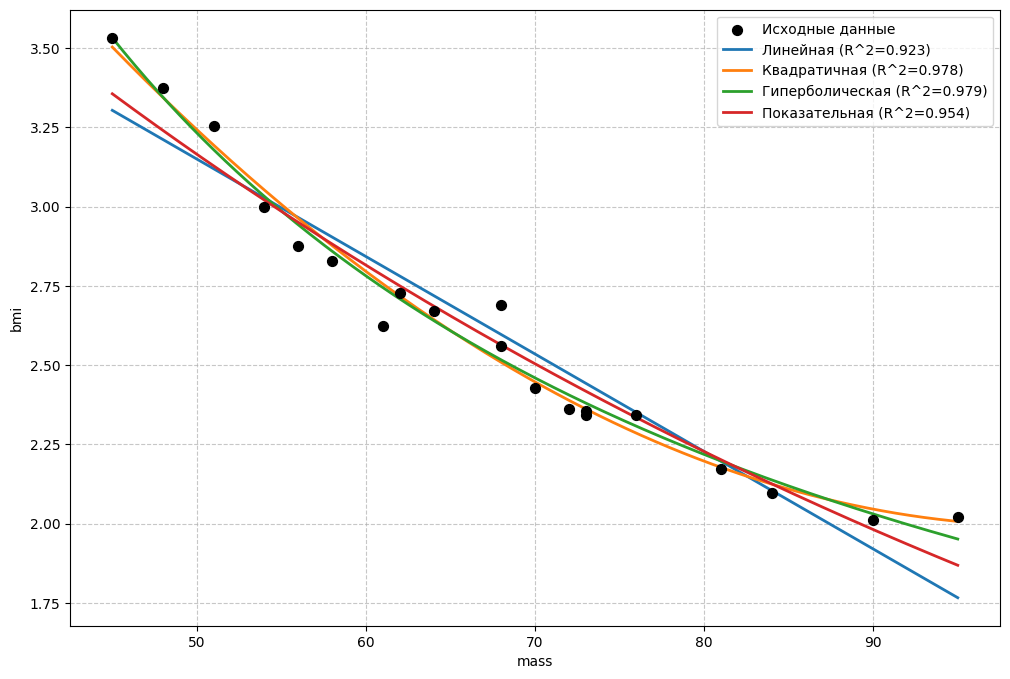

In [21]:
#y = w1*x + w0
coeffs_lin = np.polyfit(x, y, 1)
y_pred_lin = np.polyval(coeffs_lin, x)

#  y = w2*x^2 + w1*x + w0
coeffs_quad = np.polyfit(x, y, 2)
y_pred_quad = np.polyval(coeffs_quad, x)

#y = w1/x + w0
z = 1 / x
coeffs_hyp = np.polyfit(z, y, 1)  # [w1, w0]
y_pred_hyp = np.polyval(coeffs_hyp, z)

# y = w0 * (w1 ** x)
log_y = np.log(y)
coeffs_exp_lin = np.polyfit(x, log_y, 1)
ln_w1, ln_w0 = coeffs_exp_lin
w1_exp = np.exp(ln_w1)
w0_exp = np.exp(ln_w0)
y_pred_exp = w0_exp * (w1_exp ** x)

def r_kvadrat(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

r2_lin = r_kvadrat(y, y_pred_lin)
r2_quad = r_kvadrat(y, y_pred_quad)
r2_hyp = r_kvadrat(y, y_pred_hyp)
r2_exp = r_kvadrat(y, y_pred_exp)

print(f"Линейная R^2: {r2_lin:.4f}")
print(f"Квадратичная R^2: {r2_quad:.4f}")
print(f"Гиперболическая R^2: {r2_hyp:.4f}")
print(f"Показательная R^2: {r2_exp:.4f}")

print("=---------------------=")
# Построение графиков регрессий
x_smooth = np.linspace(x.min(), x.max(), 300)

y_smooth_lin = np.polyval(coeffs_lin, x_smooth)
y_smooth_quad = np.polyval(coeffs_quad, x_smooth)
y_smooth_hyp = np.polyval(coeffs_hyp, 1/x_smooth)
y_smooth_exp = w0_exp * (w1_exp ** x_smooth)

plt.figure(figsize=(12, 8))
plt.scatter(x, y, label='Исходные данные', color='black', s=50, zorder=5)

plt.plot(x_smooth, y_smooth_lin, label=f'Линейная (R^2={r2_lin:.3f})', linewidth=2)
plt.plot(x_smooth, y_smooth_quad, label=f'Квадратичная (R^2={r2_quad:.3f})', linewidth=2)
plt.plot(x_smooth, y_smooth_hyp, label=f'Гиперболическая (R^2={r2_hyp:.3f})', linewidth=2)
plt.plot(x_smooth, y_smooth_exp, label=f'Показательная (R^2={r2_exp:.3f})', linewidth=2)

plt.xlabel('mass')
plt.ylabel('bmi')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Квадратичная и гиперболическая модели лучше других описывают данные; все модели показывают убывающую зависимость: чем больше масса тем ниже BMI. Это не физически обоснованно, если рост постоянен


## 4. Проверка уравнения регрессии
Для наилучшего и наихудшего уравнения регрессии проверить соотвествие моедли данным с помощью критерия Фишера

In [23]:
def f_(y_true, y_pred, p):
    n = len(y_true)
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    df_model = p
    df_resid = n - p - 1

    f_stat = (r2 / df_model) / ((1 - r2) / df_resid)
    p_value = 1 - stats.f.cdf(f_stat, df_model, df_resid)
    
    return f_stat, p_value, r2


In [26]:
models = {
    'Lin': (y_pred_lin, 1),
    'Sq': (y_pred_quad, 2),
    'Hyp': (y_pred_hyp, 1),
    'EXP': (y_pred_exp, 1)
}

f_results = {}
alpha = 0.05

for name, (y_pred, p) in models.items():
    f_stat, p_val, r2 = f_(y, y_pred, p)
    f_results[name] = {'F': f_stat, 'p-value': p_val, 'R2': r2}
    print(f"{name} регрессия:")
    print(f"  F-статистика = {f_stat:.2f}")
    print(f"  p-value = {p_val:.2e}")
    print(f"  R^2 = {r2:.4f}")
    if p_val < alpha:
        print(f"  Знач p < {alpha}.\n")
    else:
        print(f" Не знач p >= {alpha}.\n")

best_model_name = max(f_results, key=lambda k: f_results[k]['R2'])
worst_model_name = min(f_results, key=lambda k: f_results[k]['R2'])

print(f"Лучшая  {best_model_name} (R^2 = {f_results[best_model_name]['R2']:.4f})")
print(f"Худшая {worst_model_name} (R^2 = {f_results[worst_model_name]['R2']:.4f})")

Lin регрессия:
  F-статистика = 215.07
  p-value = 1.88e-11
  R^2 = 0.9228
  Знач p < 0.05.

Sq регрессия:
  F-статистика = 376.64
  p-value = 8.33e-15
  R^2 = 0.9779
  Знач p < 0.05.

Hyp регрессия:
  F-статистика = 844.60
  p-value = 1.11e-16
  R^2 = 0.9791
  Знач p < 0.05.

EXP регрессия:
  F-статистика = 375.35
  p-value = 1.67e-13
  R^2 = 0.9542
  Знач p < 0.05.

Лучшая  Hyp (R^2 = 0.9791)
Худшая Lin (R^2 = 0.9228)


Все проверенные уравнения статистически значимы по критерию Фишера, поскольку F-статистика превышает критическое значение. Однако квадратичная модель предпочтительна